# Viewing CNN Filters
## Review
At this point, I've tested my CNN a little bit and learned that the hair really matters. If the CNN sees a lighter object representing a head with dark textures on either side of the head, it will think it is Lars. Fair enough, that might be one of the insights I would make when I compare myself with anyone, especially a female with long hair!

## Convolutional Filters
I think some insight can be learned by actually looking at the filters. The convolutional filters are what's actually generating the inputs to the final fully connected and output layers. Again, the fully connectd layers are essentially a dot product of the filters and parts of the image:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/15_finished_convolution_3_filters.png" style="width: 500px;"/>

The filters would provide a sneak peek, well actually a direct peek, into how the CNN is making its decisions. Often times, I've seen first layer and second layer filters come out as detecting edges, specific shapes, and in the context of human faces: ears, noses, mouths... etc.

I found [some code online](https://github.com/tflearn/tflearn/issues/291) that will help us visualize the filters.

## Viewing The CNN Filters

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# TFlearn libraries
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

### Loading My Saved CNN
We have to actually create the structure of the CNN before loading it. Something I tweaked with for a few minutes for before figuring it out.

In [4]:
# sentdex's code to build the neural net using tflearn
#   Input layer --> conv layer w/ max pooling --> conv layer w/ max pooling --> fully connected layer --> output layer
convnet = input_data(shape = [None, 91, 91, 1], name = 'input')

convnet = conv_2d(convnet, 32, 10, activation = 'relu', name = 'conv_1')
convnet = max_pool_2d(convnet, 2, name = 'max_pool_1')

convnet = conv_2d(convnet, 64, 10, activation = 'relu', name = 'conv_2')
convnet = max_pool_2d(convnet, 2, name = 'max_pool_2')

convnet = fully_connected(convnet, 1024, activation = 'relu', name = 'fully_connected_1')
convnet = dropout(convnet, 0.8, name = 'dropout_1')

convnet = fully_connected(convnet, 2, activation = 'softmax', name = 'fully_connected_2')
convnet = regression(convnet, optimizer = 'sgd', learning_rate = 0.01, loss = 'categorical_crossentropy', name = 'targets')

In [5]:
# Define and load CNN
model = tflearn.DNN(convnet)
model.load('model_4_epochs_0.03_compression_99.6_named.tflearn')

INFO:tensorflow:Restoring parameters from /Users/chiwang/Documents/Projects/Dev/chi_lars_face_detection/notebook/model_4_epochs_0.03_compression_99.6_named.tflearn


### Import Function To View Convolutional Filters
Let's import that code we found from github to view our convolutional filters

In [44]:
import six

def display_convolutions(model, layer, padding=4, filename=''):
    if isinstance(layer, six.string_types):
        vars = tflearn.get_layer_variables_by_name(layer)
        variable = vars[0]
    else:
        variable = layer.W

    data = model.get_weights(variable)

    # N is the total number of convolutions
    N = data.shape[2] * data.shape[3]
    print('There are {} filters'.format(N))

    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[0]
    # Size of the result image including padding
    result_size = filters_per_row * (filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.zeros((result_size, result_size))

    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[3]):
        for c in range(data.shape[2]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            for i in range(filter_size):
                for j in range(filter_size):
                    result[filter_y * (filter_size + padding) + i, filter_x * (filter_size + padding) + j] = \
                        data[i, j, c, n]
            filter_x += 1

    # Normalize image to 0-1
    min = result.min()
    max = result.max()
    result = (result - min) / (max - min)

    # Plot figure
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')

    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

    plt.show()

### First Convolutional Layer Filters

There are 32 filters


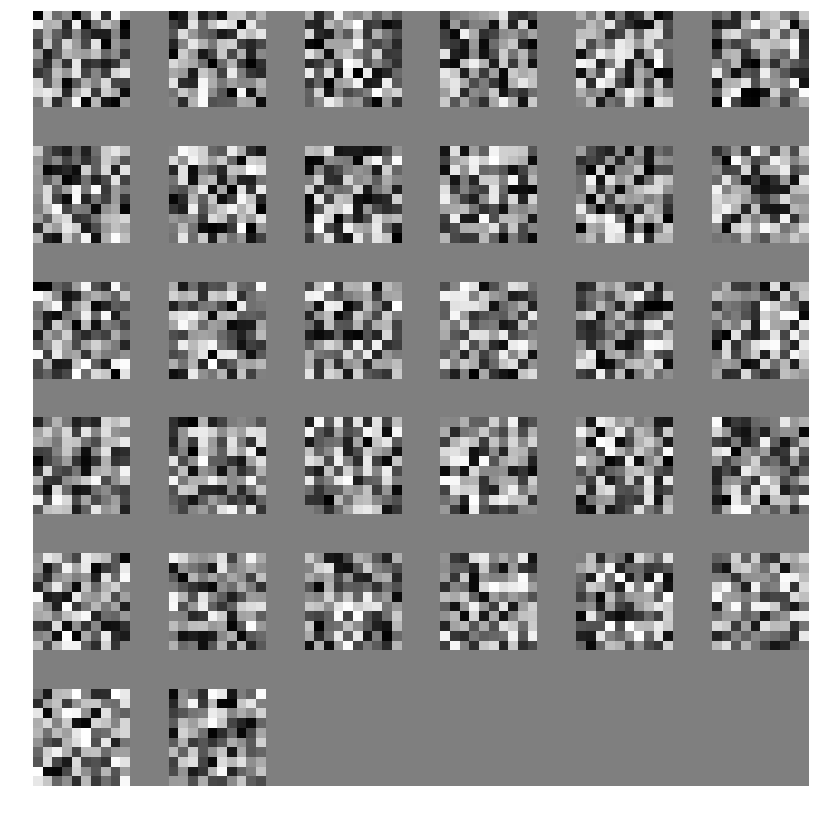

In [45]:
# Display first convolutional layer filters (32 filters)
display_convolutions(model, 'conv_1')

Alrighty then... this looks like absolute garbage to me, i.e., the untrained eye. None of this particularly looks like anything. I'm trying to look for edges and whatnot, and I can make some out if I squint my eyes, but honestly it all just looks like static... Will the second level layers shed some more light into the meaning of life?

### Second Convolutional Layer Filters

There are 2048 filters


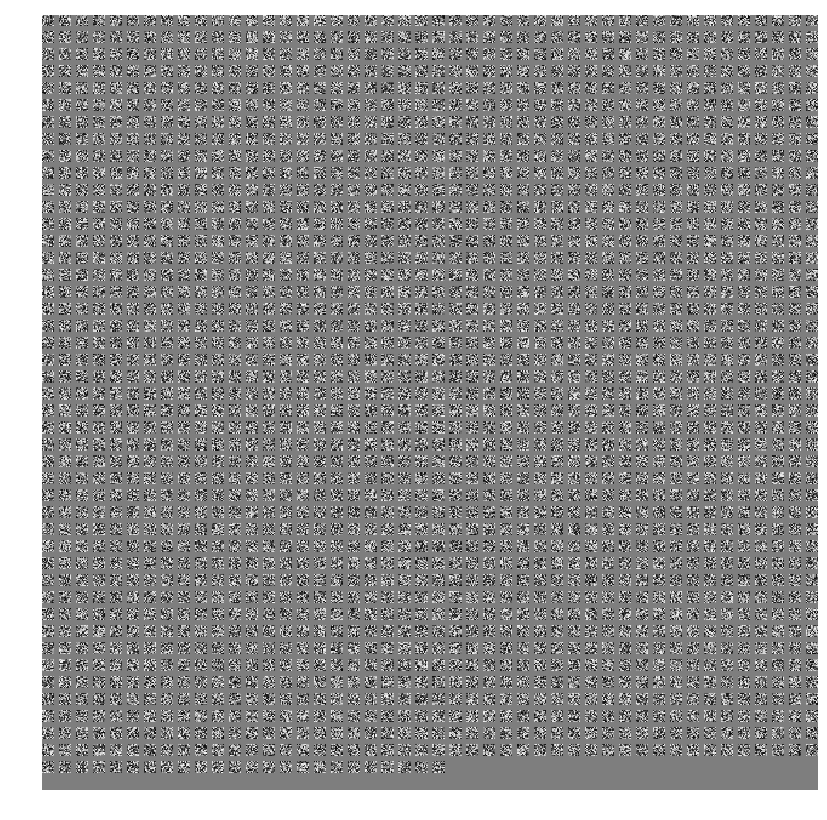

In [48]:
# Display first convolutional layer filters ( filters)
display_convolutions(model, 'conv_2', filename = 'hello')

I can't quite see much, so let's take a closer look:

![](https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/48_conv_filter_2.png)

Not quite sure what's happening here either... I don't see any particular patterns that I recognize right away...Some are oviously lighter, and some are obviously darker, but I don't quite see any rhyme or reason why they are patterened / textured as they are. They're not really representing shapes or body parts or anything. I'm not saying that they should necessarily, but I guess that's what my naive mind was expecting.

If I think about it objectively, the filters theoretically should be able to represent the differences in the photo, so if the filters were focused around the hairs, I guess hair _**could**_ look like that pixelized and up close. I just don't quite know enough to say that that's what's happening.